<a href="https://colab.research.google.com/github/aureliodeboa/Restic-K-means/blob/main/Atividade2Restic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [102]:
import pandas as pd
import zipfile
from urllib.request import urlretrieve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Carregamento dos dados

In [5]:
# Download e extração do dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
urlretrieve(url, "har_dataset.zip")

# Extração do arquivo
with zipfile.ZipFile("har_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("HAR_Dataset")

# Leitura dos dados de treino e teste
X_train = pd.read_csv('HAR_Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_test = pd.read_csv('HAR_Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Concatenando os dados
X = pd.concat([X_train, X_test], ignore_index=True)


<ipython-input-5-7513e45fe130>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('HAR_Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-5-7513e45fe130>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('HAR_Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:
# Carregar os nomes das features
features = pd.read_csv('HAR_Dataset/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, usecols=[1])

# Atribuir nomes às colunas
X.columns = features[1].values

X.head()


<ipython-input-7-fd865fb9aa7c>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('HAR_Dataset/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, usecols=[1])


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# Analise Exploratória

In [18]:
print(X.shape) #Verificando tamanho do dataset

(10299, 561)


In [19]:
print(X.info()) #Verificando estrutura do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 44.1 MB
None


In [33]:
# Estatísticas descritivas
print(X.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   


### Analisar correlação

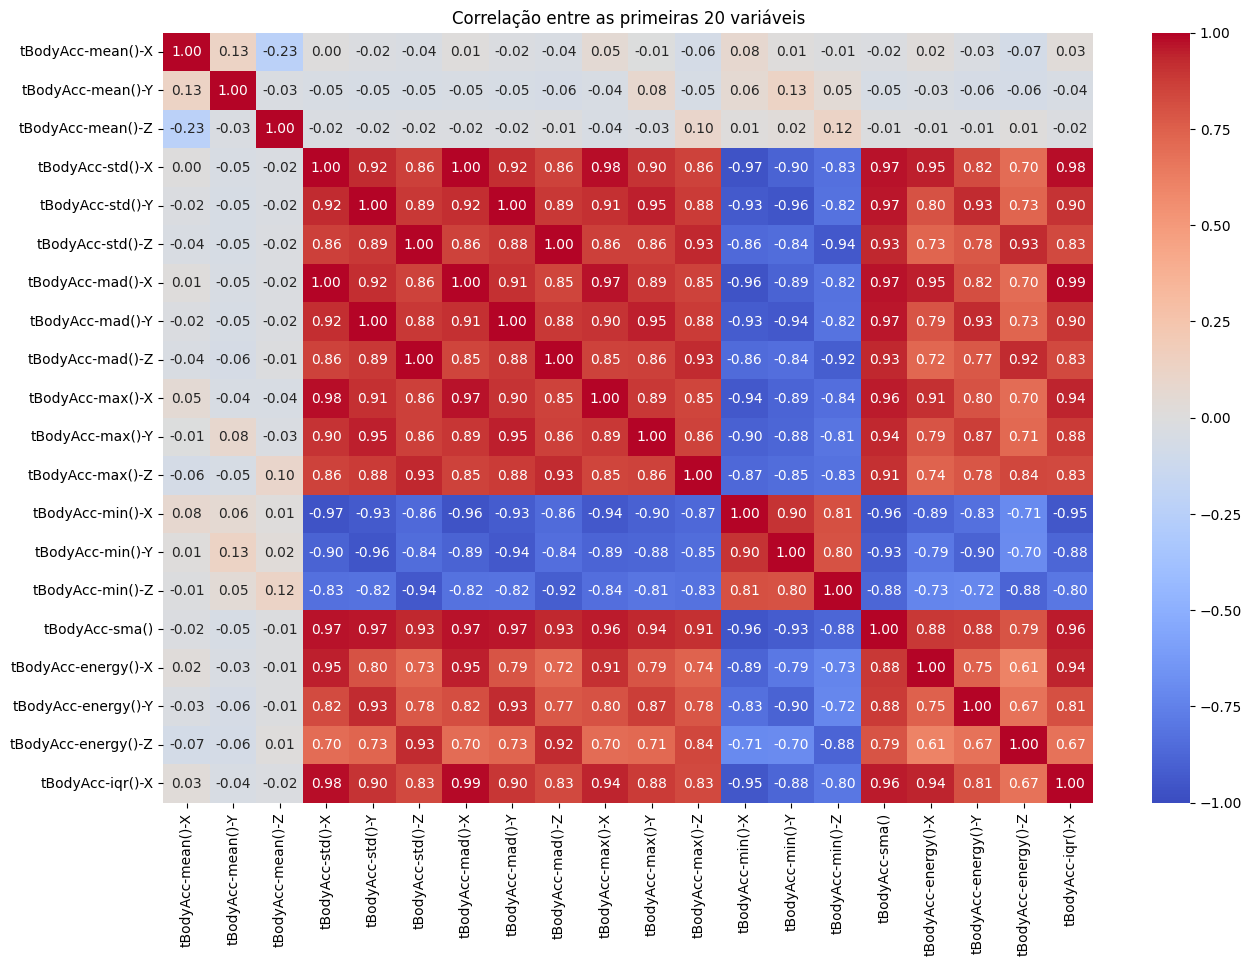

In [58]:
# Correlação entre as primeiras 20 variáveis para análise
correlation_matrix = X.iloc[:, :20].corr()
correlation_df = correlation_matrix.reset_index()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlação entre as primeiras 20 variáveis')
plt.show()

In [59]:
correlation_df

,index,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X
0,tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,...,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111
1,tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,...,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484
2,tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,...,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312
3,tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,...,0.898890,0.857902,-0.965073,-0.896348,-0.829912,0.974977,0.948393,0.821207,0.701608,0.980537
4,tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,...,0.950847,0.882653,-0.930179,-0.959132,-0.824408,0.967901,0.802966,0.929622,0.731527,0.903326
5,tBodyAcc-std()-Z,-0.036071,-0.054153,-0.015632,0.861910,0.888259,1.000000,0.855837,0.884999,0.997360,...,0.864251,0.932565,-0.861995,-0.843859,-0.939300,0.931495,0.729607,0.777455,0.928353,0.832532
6,tBodyAcc-mad()-X,0.010303,-0.045247,-0.022872,0.998662,0.918561,0.855837,1.000000,0.912076,0.850538,...,0.894264,0.853017,-0.961471,-0.892657,-0.824501,0.972964,0.952347,0.819637,0.695653,0.988158
7,tBodyAcc-mad()-Y,-0.017488,-0.047673,-0.022966,0.916087,0.997510,0.884999,0.912076,1.000000,0.884517,...,0.946796,0.878567,-0.925924,-0.943833,-0.816598,0.965037,0.794096,0.927503,0.727773,0.897580
8,tBodyAcc-mad()-Z,-0.038805,-0.055524,-0.009577,0.856497,0.887052,0.997360,0.850538,0.884517,1.000000,...,0.862572,0.926938,-0.858690,-0.839352,-0.921789,0.929712,0.719528,0.774800,0.922130,0.828178
9,tBodyAcc-max()-X,0.046943,-0.039445,-0.040218,0.981226,0.911137,0.859956,0.973868,0.904283,0.853439,...,0.887553,0.849413,-0.938786,-0.889044,-0.836602,0.957778,0.913552,0.801525,0.700390,0.940893


In [60]:
# seleção das variáveis altamente correlacionadas (acima de 0.9)
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.9]
high_corr_pairs

,,0
tBodyAcc-mean()-X,tBodyAcc-mean()-X,1.000000
tBodyAcc-max()-Y,tBodyAcc-max()-Y,1.000000
tBodyAcc-std()-X,tBodyAcc-std()-X,1.000000
tBodyAcc-std()-Y,tBodyAcc-std()-Y,1.000000
tBodyAcc-std()-Z,tBodyAcc-std()-Z,1.000000
...,...,...
tBodyAcc-sma(),tBodyAcc-max()-Z,0.910813
tBodyAcc-max()-X,tBodyAcc-mad()-Y,0.904283
tBodyAcc-mad()-Y,tBodyAcc-max()-X,0.904283
tBodyAcc-std()-Y,tBodyAcc-iqr()-X,0.903326


### Examinando a distribuição das variáveis

In [45]:
sample_X = X.iloc[:, :10]  # Seleciona as 10 primeiras variáveis para exemplo

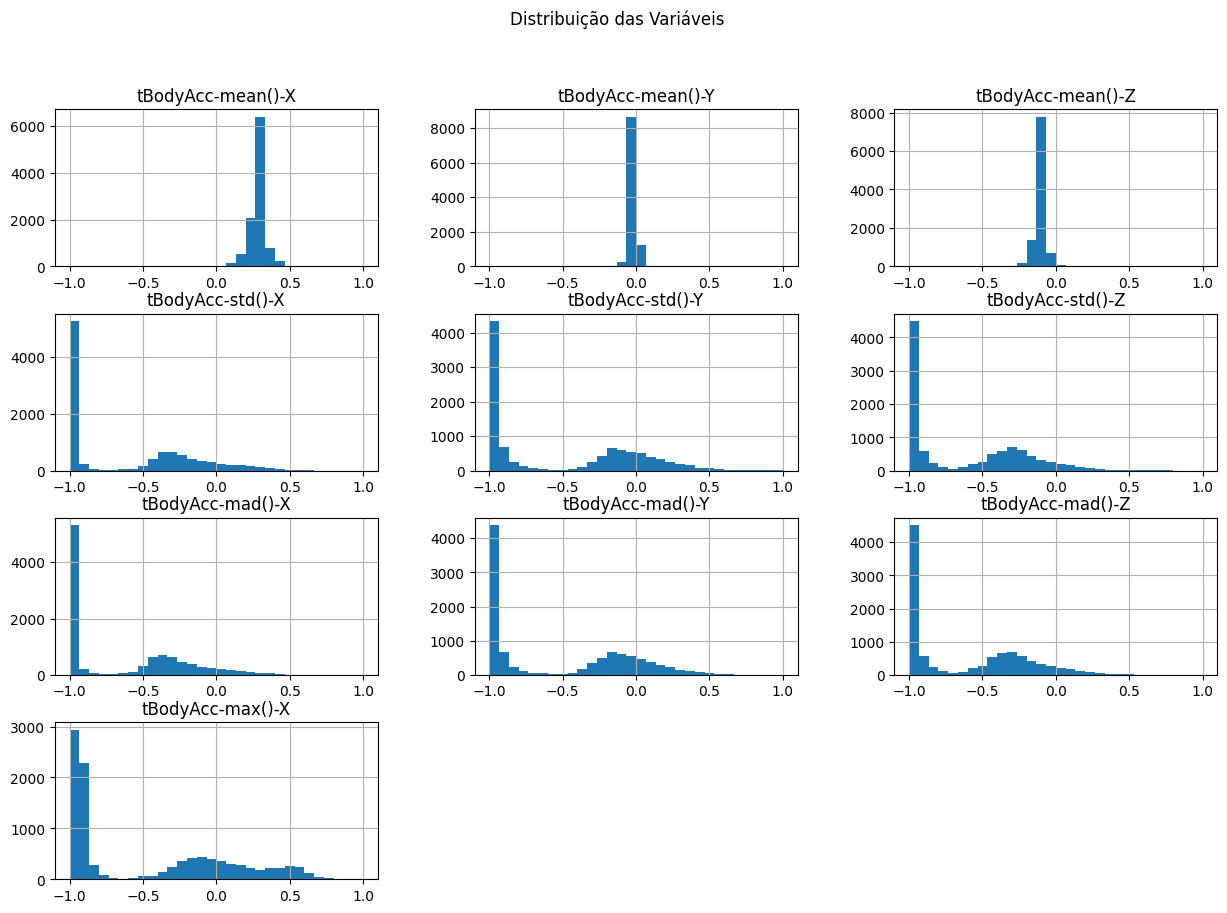

In [50]:
# Análise de distribuições com histogramas
sample_X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribuição das Variáveis")
plt.show()

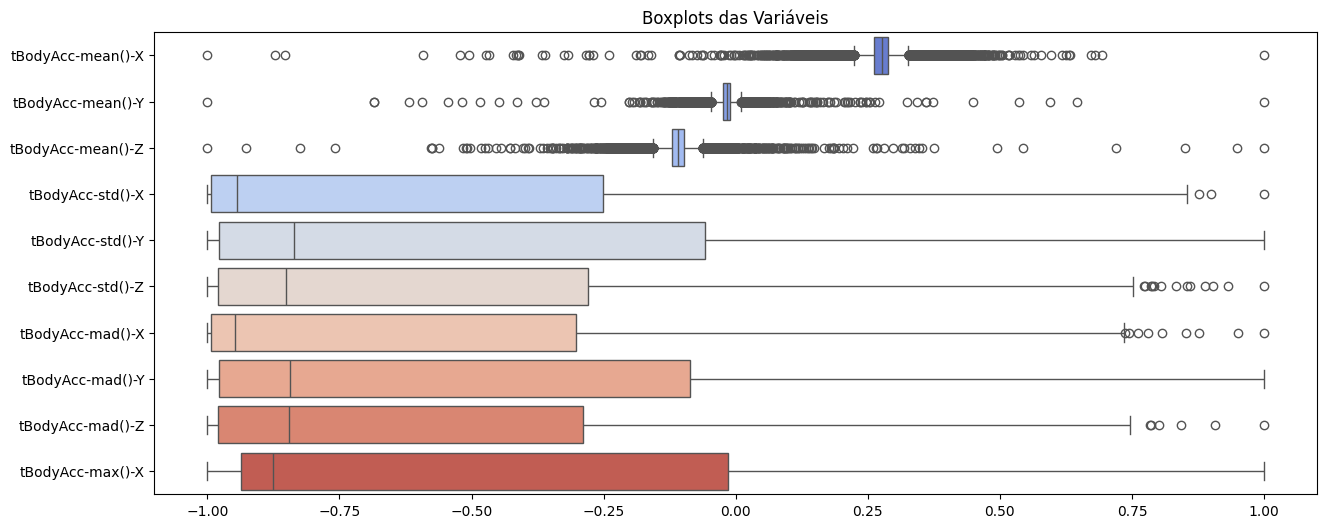

In [49]:
# Para identificar outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=sample_X, orient='h', palette='coolwarm')
plt.title('Boxplots das Variáveis')
plt.show()

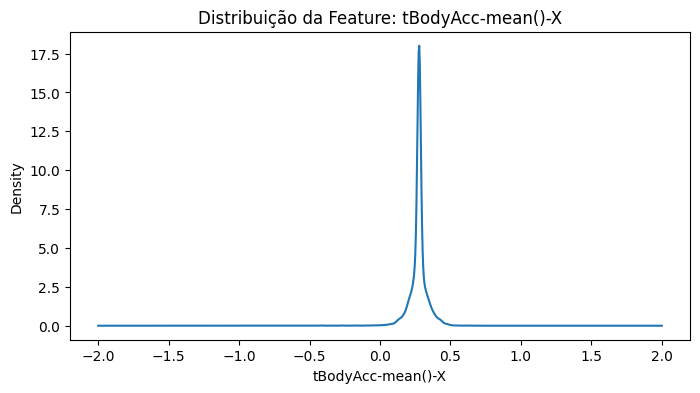

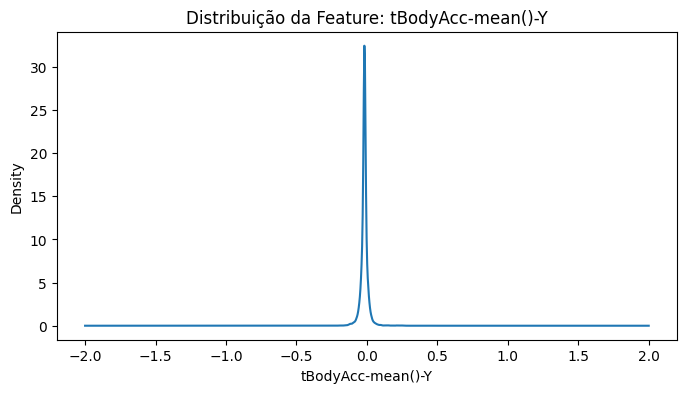

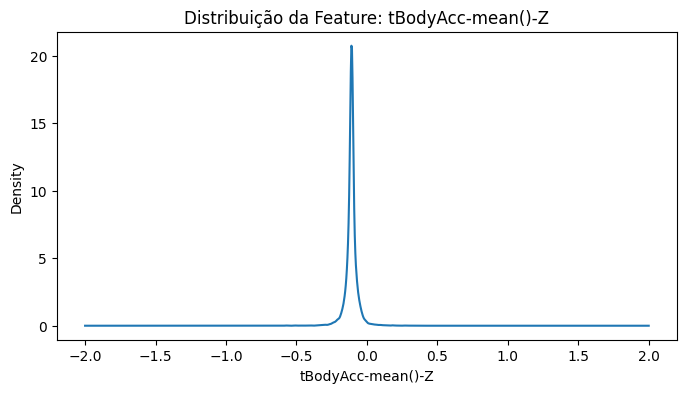

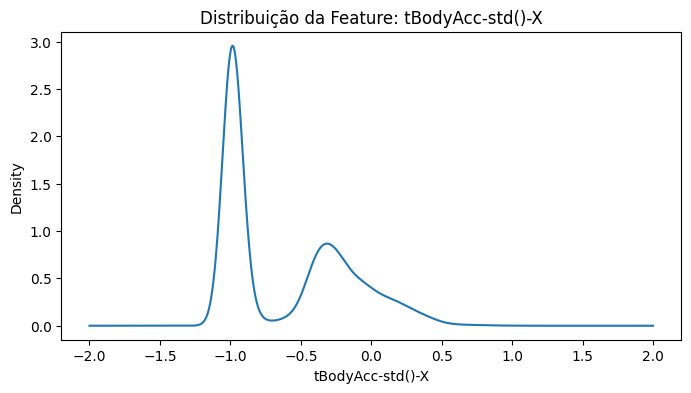

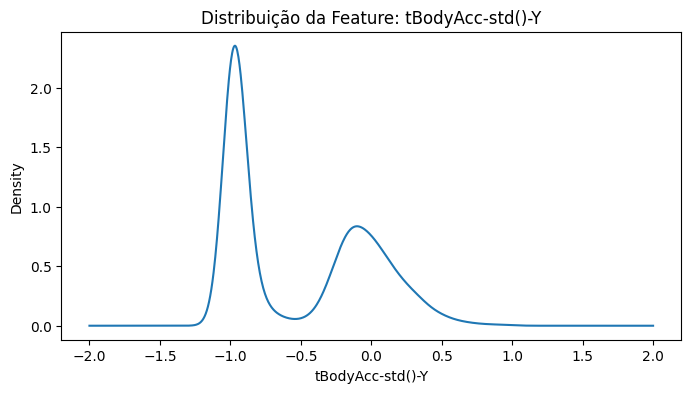

In [52]:
# Selecionar um subconjunto de features (ex.: as 5 primeiras)
selected_features = features[1].values[:5]

for feature in selected_features:
    X[feature].plot(kind='density', figsize=(8, 4), title=f'Distribuição da Feature: {feature}')
    plt.xlabel(feature)
    plt.show()

# Pré-processamento dos Dados

### Normalização

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA

In [64]:
pca = PCA(n_components=2)  # 2 componentes para visualização 2D
X_scaled_pca = pca.fit_transform(X_scaled)

In [65]:
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.50738221 0.06239186]


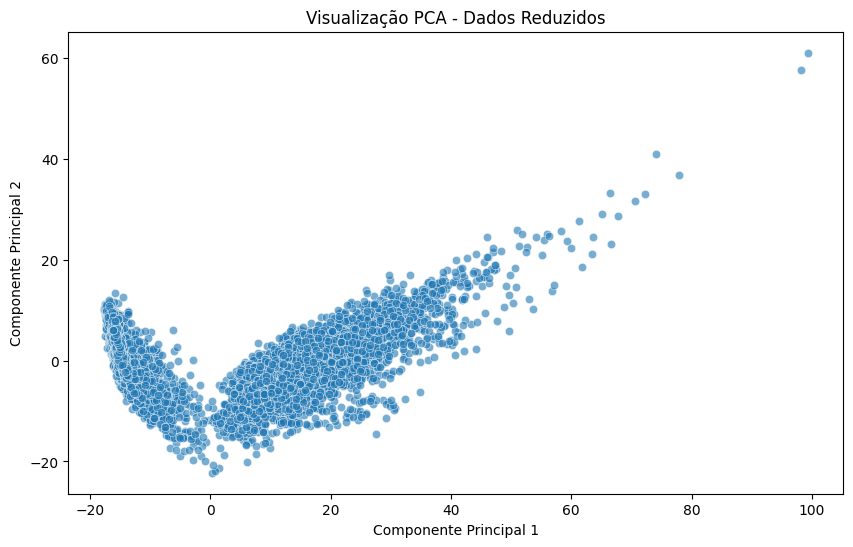

In [66]:
X_scaled_pca_df = pd.DataFrame(X_scaled_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=X_scaled_pca_df, alpha=0.6)
plt.title('Visualização PCA - Dados Reduzidos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [68]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print(pca_components.T.sort_values(by='PC1', ascending=False))  # PC1
print(pca_components.T.sort_values(by='PC2', ascending=False))  # PC2

                            PC1       PC2
fBodyAcc-sma()         0.058616 -0.007357
fBodyAccJerk-sma()     0.058578  0.010964
fBodyGyro-sma()        0.058553 -0.002291
tBodyAccJerk-sma()     0.058549  0.009849
tBodyAccJerkMag-sma()  0.058495  0.009228
...                         ...       ...
tBodyAccJerk-min()-Z  -0.054438 -0.017638
tBodyAccJerk-min()-Y  -0.054665 -0.006252
tBodyAccJerk-min()-X  -0.055324 -0.000961
tBodyAcc-min()-Y      -0.055592  0.009121
tBodyAcc-min()-X      -0.056244  0.011313

[561 rows x 2 columns]
                                PC1       PC2
fBodyAcc-meanFreq()-Z     -0.009473  0.124393
tBodyGyroMag-arCoeff()1    0.006525  0.120583
fBodyAccMag-meanFreq()    -0.003538  0.119687
tGravityAcc-arCoeff()-Z,1  0.008212  0.119596
tBodyAccMag-arCoeff()1    -0.025425  0.119473
...                             ...       ...
tBodyAccMag-arCoeff()2     0.026105 -0.108443
tGravityAccMag-arCoeff()2  0.026105 -0.108443
tBodyGyroMag-arCoeff()2   -0.003560 -0.112818
tGravityAcc-

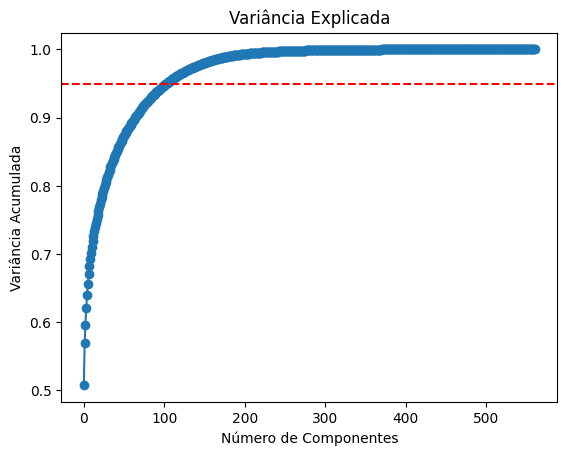

In [71]:
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('Variância Explicada')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [73]:
pca_95 = PCA(n_components=0.95)  # Retém 95% da variância
X_pca_95 = pca_95.fit_transform(X_scaled)
print(X_pca_95.shape)

(10299, 104)


### t-SNE

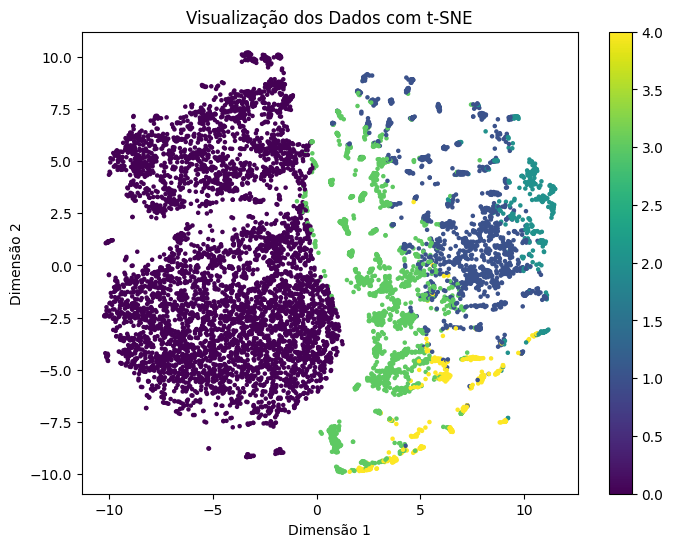

In [74]:
# Reduzindo os dados para 2 dimensões com t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Plotando os dados reduzidos em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Visualização dos Dados com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.colorbar()
plt.show()

# Implementação do Algoritmo de K-means


In [82]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

# Testar diferentes valores de K
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

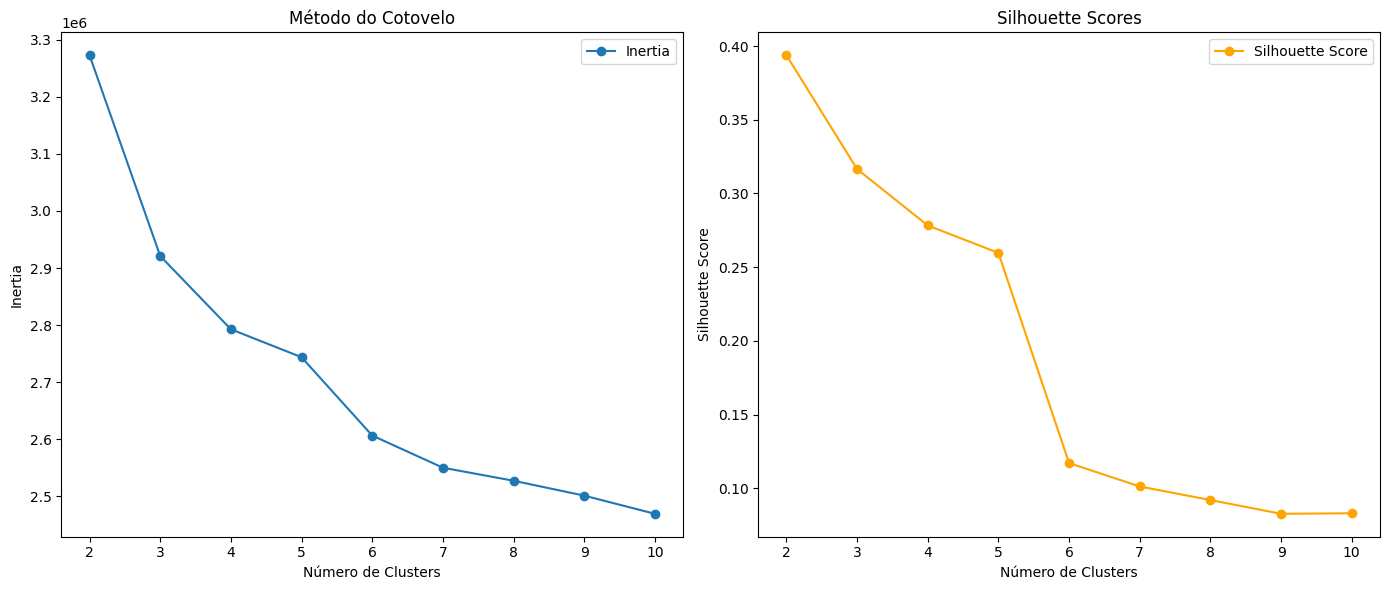

In [84]:
# Criando uma figura com 1 linha e 2 colunas de subplots
plt.figure(figsize=(14, 6))

# Plot do Método do Cotovelo
plt.subplot(1, 2, 1)  # Linha 1, Coluna 2, Subplot 1
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')
plt.legend()

# Plot dos Silhouette Scores
plt.subplot(1, 2, 2)  # Linha 1, Coluna 2, Subplot 2
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.legend()

# Exibindo os gráficos
plt.tight_layout()  # Ajusta o espaçamento entre subplots
plt.show()

In [85]:
# Identificando o "cotovelo" (ponto de maior mudança na inércia)
elbow_k = np.diff(inertia).argmin() + 2  # +2 porque np.diff reduz o índice em 1

# Encontrando o melhor K com base no silhouette score
best_silhouette_k = cluster_range[1:][np.argmax(silhouette_scores)]

print(f"Número ideal de clusters pelo método do cotovelo: {elbow_k}")
print(f"Número ideal de clusters pelo silhouette score: {best_silhouette_k}")

Número ideal de clusters pelo método do cotovelo: 2
Número ideal de clusters pelo silhouette score: 3


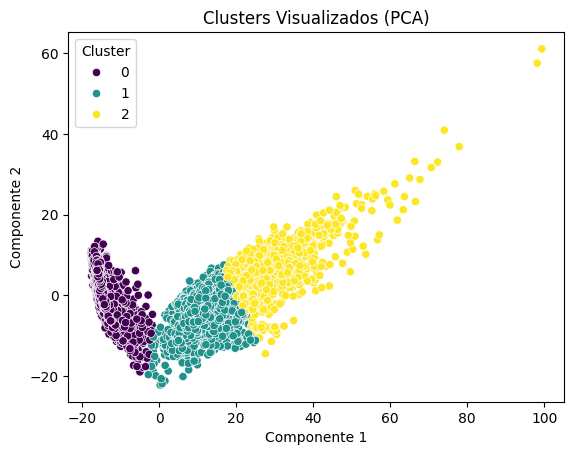

In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Adicione os rótulos aos dados reduzidos
X_scaled_pca_df = pd.DataFrame(X_scaled_pca, columns=['Componente 1', 'Componente 2'])
X_scaled_pca_df['Cluster'] = kmeans.labels_

# Visualize os clusters
sns.scatterplot(data=X_scaled_pca_df, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis')
plt.title('Clusters Visualizados (PCA)')
plt.show()

In [89]:
# Treinamento do modelo
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Labels preditos
clusters = kmeans.labels_

# Adicionando os clusters ao DataFrame original
X['Cluster'] = clusters

In [90]:
# Inércia final
print(f"Inércia final do modelo: {kmeans.inertia_}")

# Silhouette Score final
final_silhouette_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {final_silhouette_score:.2f}")


Inércia final do modelo: 2792698.1292459844
Silhouette Score: 0.28


In [94]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [95]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [98]:
kmeans1 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X_scaled)
kmeans2 = KMeans(n_clusters=5, init='k-means++', random_state=43).fit(X_scaled)

print("Consistência entre execuções:", adjusted_rand_score(kmeans1.labels_, kmeans2.labels_))

Consistência entre execuções: 0.9373691824899841


# Avaliação

In [99]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score Médio: {silhouette_avg:.3f}")


Silhouette Score Médio: 0.150


In [100]:
print(f"Inércia (Soma das Distâncias): {kmeans.inertia_:.3f}")


Inércia (Soma das Distâncias): 2781602.140


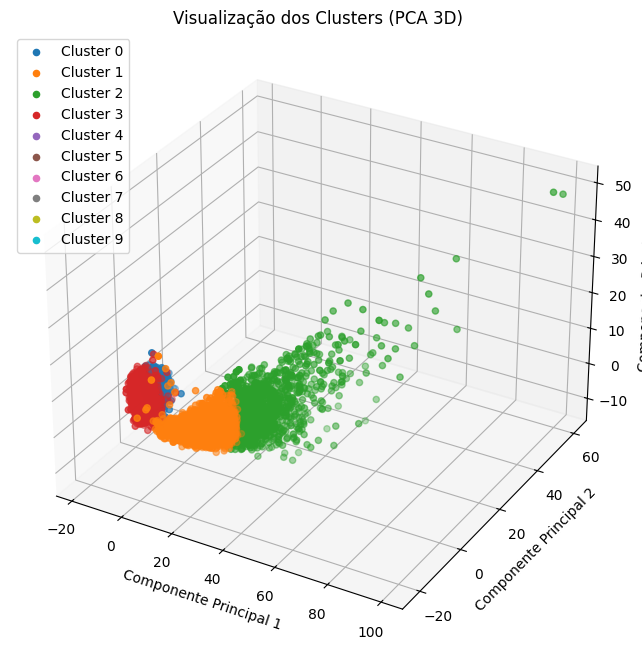

In [104]:
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(k):
    ax.scatter(
        X_pca_3d[kmeans.labels_ == cluster, 0],
        X_pca_3d[kmeans.labels_ == cluster, 1],
        X_pca_3d[kmeans.labels_ == cluster, 2],
        label=f'Cluster {cluster}'
    )
ax.set_title('Visualização dos Clusters (PCA 3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()
plt.show()

In [101]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features[1])
cluster_summary = cluster_centers.describe()

print("Média das variáveis em cada cluster:")
print(cluster_centers)


Média das variáveis em cada cluster:
1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.031694           0.024018           0.010475         -0.871221   
1          -0.078163          -0.085082          -0.047763          0.797568   
2           0.125469          -0.029095          -0.039938          1.442897   
3          -0.024157           0.103367           0.078791         -0.797060   

1  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.939422         -0.911699         -0.864561         -0.938817   
1          0.857458          0.848677          0.786668          0.872850   
2          1.374761          1.260674          1.446329          1.334710   
3         -0.731455         -0.682594         -0.794151         -0.726496   

1  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.917084         -0.865792  ...                         0.552464   
1          0.86758

In [44]:
for cluster in range(kmeans.n_clusters):
    print(f'Cluster {cluster}:')
    print(X[kmeans.labels_ == cluster].describe())


Cluster 0:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        5568.000000        5568.000000        5568.000000   
mean            0.276091          -0.015991          -0.108108   
std             0.041053           0.029250           0.039650   
min            -0.472557          -0.544314          -0.925988   
25%             0.273461          -0.019724          -0.113903   
50%             0.277354          -0.017002          -0.108211   
75%             0.280849          -0.013916          -0.102569   
max             0.692761           0.594513           0.375539   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       5568.000000       5568.000000       5568.000000       5568.000000   
mean          -0.978967         -0.943632         -0.949786         -0.981187   
std            0.037565          0.092165          0.079157          0.034937   
min           -1.000000         -1.000000         -1.000000         -1

# Dendorgrama



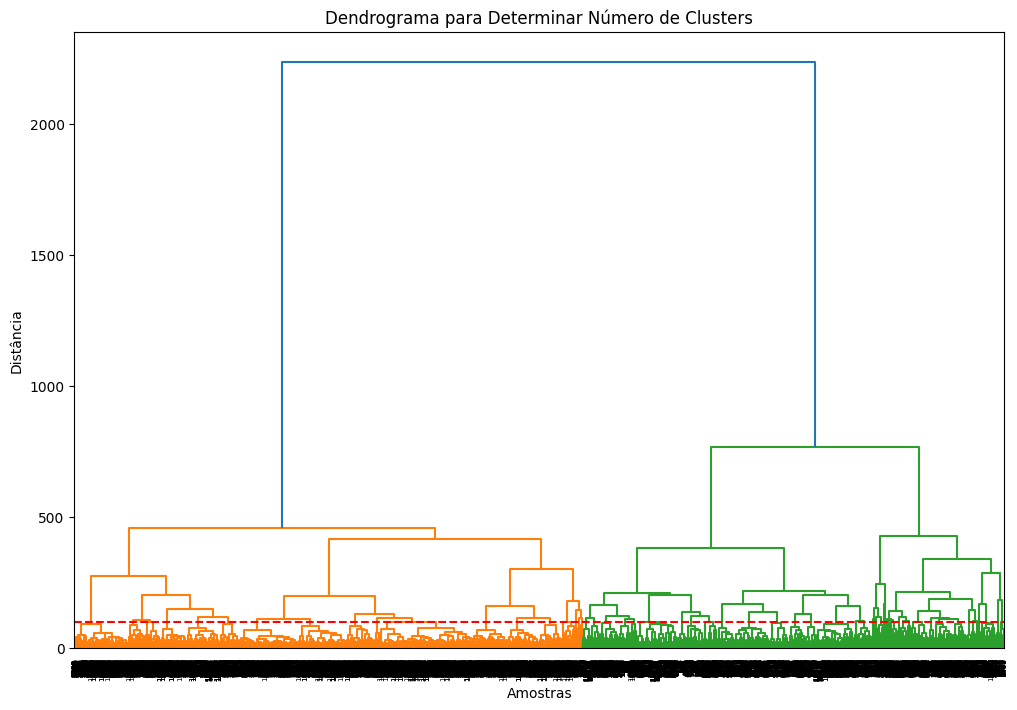

In [9]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduzir a dimensionalidade (opcional, para visualização)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar a matriz de ligação e o dendrograma
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.axhline(y=100, color='r', linestyle='--')  # Ajuste o valor de 'y' conforme observado
plt.title('Dendrograma para Determinar Número de Clusters')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

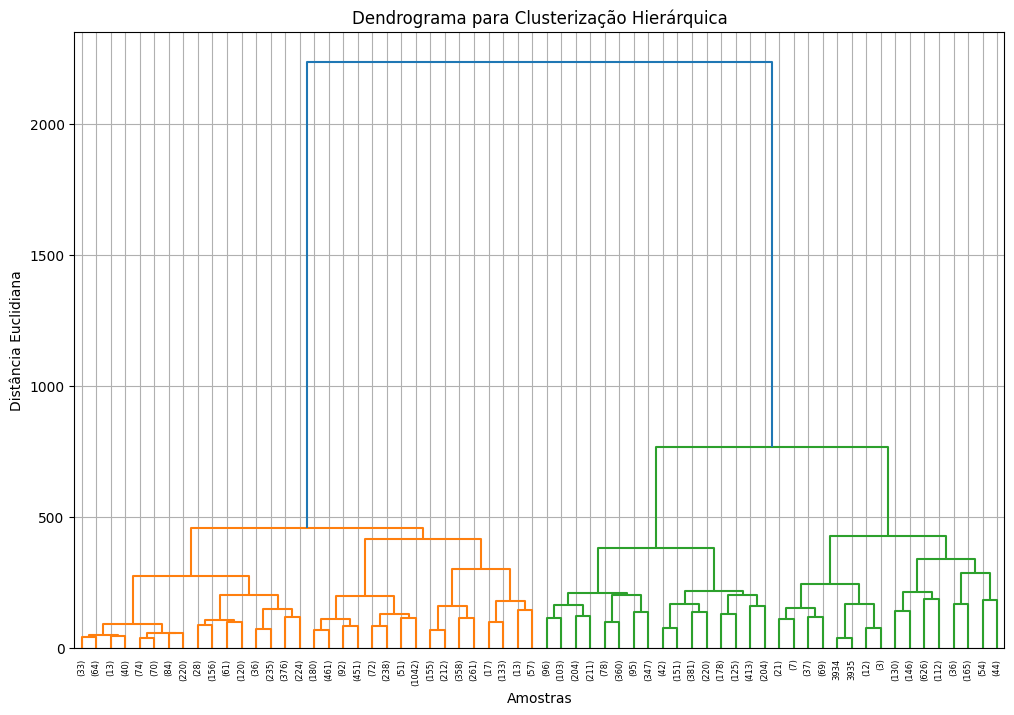

In [12]:
# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculando a matriz de ligação usando o método Ward
linkage_matrix = linkage(X_scaled, method='ward')

# Plotando o dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # truncate_mode limita o nível de corte
plt.title('Dendrograma para Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.grid(True)
plt.show()

# Testes

In [ ]:
# Testar diferentes valores de K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
silhouette_scores = []
for k in K_range[1:]:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K_range[1:], silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes valores de K')
plt.show()

In [ ]:
# Selecionando o melhor K (exemplo: 6 baseado no gráfico anterior)
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualizando os clusters em 2D após PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=5)
plt.title('Clusters Identificados pelo K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

In [ ]:
# Avaliação final dos clusters
final_silhouette_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score Final: {final_silhouette_score:.2f}")

In [ ]:
# Média das features por cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features[1])
print(cluster_centers)